<a href="https://colab.research.google.com/github/RiszenPhoenix/Work-in-Progress/blob/main/old_messy_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS304 Data Science Project
## Title: **The Performance of Video Games Based on the Masses**
### Team Members: **Christopher Holt, Ethan Smith**

## Abstract:

**Video games are entertainment purchases, and the pressure is on developers to present a product that their customer base will enjoy. Thus, public opinion is important to the immediate and long-term success of these projects. We plan to use a Kaggle-sourced data set regarding Steam’s library of video games. The data source contains various characteristics of video games, including user scores, genre, price, and more. In examining this data set, we want to explore the question: “Does public opinion affect a game’s ability to garner support in the the number of owners it has?” The ability to visualize potential relationships between factors such as user scores, estimated owners, and other factors would aid in understanding the influence of public opinion, whether present or not, on the perceived success of games through owner metrics. We plan to use scatterplots and histograms to create models that illustrate comparisons among the previously mentioned aspects of the data set. In addition to our main question, any outliers in the data will be highlighted to uncover exceptions and subtler dynamics. Possible cases might include games that have high user scores but are extremely inexpensive or expensive, games that have low user scores but considerable amounts of owners, or games that have high user scores and have very little owners. We believe negative reviews can diminish faith and decision to purchase a game, motivated by social-image concerns of appearing as an "incompetent consumer," leading users to avoid games after reading negative feedback. This aligns with broader observations that negative sentiment affects future buying decisions. By integrating these insights with our visual modeling, our study aims to reveal how sentiment shapes commercial success. We anticipate confirming that higher ratios of negative reviews are associated with lower ownership, providing developers with both analytical tools and a strategic perspective on managing user sentiment to maintain avid customer bases.**

## Setup

**THE FOLLOWING CODE IMPORTS LIBRARIES AND CREATES THE DATAFRAME FOR THE DATA SET, df**

In [153]:
# Setup
# TODO: load libraries and other utilities you'll use throughout your notebook here
import pandas as pd
from requests import get
import pathlib
import subprocess
import numpy as np

r = get('https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/top-1000-steam-games')
r, r.status_code
subprocess.run('ls -la', shell=True, capture_output=True).stdout.splitlines()
ds = pathlib.Path('steam_games.zip')
ds.write_bytes(r.content)
#print(ds)
#pathlib.Path('steam_games.zip').exists()
subprocess.run(['unzip', 'steam_games.zip'])
subprocess.run('ls -la', shell=True, capture_output=True).stdout.splitlines()
df = pd.read_csv('./93182_steam_games.csv')

/tmp/ipython-input-2465665914.py:18: DtypeWarning: Columns (3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./93182_steam_games.csv')


## Data Set / Aquisition

# The Steam Games Dataset
is a comprehensive collection of game information from the Steam digital distribution platform, containing detailed attributes for over ninety thousand games. This dataset was carefully curated to provide insights into the Steam ecosystem, including game characteristics, user engagement metrics, and market trends.

---

The dataset was compiled through the hard work of Joakim Arvidsson's systematic web scraping of Steam's public API and store pages, focusing on the most popular games to create a representative sample of the platform's content. The collection process involved:

    Structured data extraction from Steam's public interfaces
    Standardized formatting of game attributes
    Quality control measures to ensure data consistency
    Annual updates to maintain currency of information


The dataset is organized into a tabular format with the following key attributes:

    Attribute	Data Type	Description	Purpose
    app_id	Integer	Unique Steam identifier	Primary key for game identification
    name	String	Game title	Game identification
    release_date	Date	Launch date on Steam	Temporal analysis
    price	Float	Current price in USD	Monetary analysis
    categories	Array	Game genres/tags	Content classification
    platforms	Array	Supported operating systems	Compatibility tracking
    achievements	Integer	Number of achievements	Game feature analysis
    positive_ratings	Integer	Number of positive reviews	Quality assessment
    negative_ratings	Integer	Number of negative reviews	Quality assessment
    average_playtime	Float	Average hours played	Engagement metrics
    owners	String	Estimated player count range	Popularity metrics
    Data Quality and Limitations

The dataset maintains high data quality through:

    Annual updates to reflect current Steam store information
    Consistent formatting across all entries
    Comprehensive coverage of key game attributes
    Standardized rating calculation methods

Important considerations:

    Owner counts are provided as ranges (e.g., "1,000 - 2,000")
    Ratings are subject to change over time
    Some games may have incomplete information for certain fields
    Data represents a snapshot of the Steam store at time of collection

This dataset is particularly valuable for:

    Game market analysis
    Popularity trend studies
    Genre distribution research
    Player engagement patterns
    Price-point analysis

The structured format and comprehensive attribute set make it suitable for both exploratory data analysis and machine learning applications, while maintaining data integrity through consistent formatting and regular updates.

## Exploratory Analysis / Visualization

**TODO: (300-600 words) Explain what you're looking for in the data to help you understand how to use it to answer your question or otherwise meet your project goals. Then, explain what steps you took to explore the dataset, including code that implements these explorations. Finally, comment on the results of your exploration and identify how it shaped the latter steps of your project. You may want to use additional text and code cells to intersperse elements of your report with code that computes supporting statistics and visualizations.**

What we are looking to understand is the structure and columns of the dataset itself. Knowing the structure makes any further cleaning or analyzing far easier. To do so, we can look at the shape, head and datatypes of the different attributes to understand how manipulating and cleaning the data later can be done.


Seeing the columns allows for accurate column/attribute names to be established and known. These are printed in a list format. Using print(df.dtypes), we can more neatly see each column and the data type of each column. Estimated owners, for example, is a string rather than an estimated number. This would make any integer manipulation impossible, and other ways for examining such a thing might need to be explored. Being able to understand the nature of the data first will help us further master the interpretation of the data later on.

In [154]:
# Analyze
# TODO: add code to perform exploratory analysis or visualize
print(df.columns)
print(df.dtypes)
# elements of your dataset.

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')
AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the ga

We also must know where data is not present. Like everything, this data set is not perfect and contains some null values. Using print(df.isnull().sum()), we can see which columns contain null values and how many times. It must be stated, however, that not all of these columns are relevant to the analysis we want to do, nor the question we want to answer.

In [155]:
print(df.isnull().sum())

AppID                             0
Name                              3
Release date                      0
Estimated owners              76720
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 4790
Supported languages               0
Full audio languages              0
Reviews                       82583
Header image                      0
Website                       51528
Support url                   48954
Support email                 15834
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                89159
User score                        0
Positive                          0
Negative                          0
Score rank                    93175
Achievements                      0
Recommendations                   0
Notes                       

Seeing these all in list formats is good, but true visualization comes from seeing the head or tail of the dataset. Using .head(), a sample of the data itself is printed out in table format for us humans to better understand. Using this is highly effective in understanding and better visualizing the data set.

In [156]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],['Simplified Chinese'],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,13639516830@163.com,True,False,False,0,NaN,0,5,7,NaN,44,0,NaN,0,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']","['English', 'Russian']",NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,catinjar42@gmail.com,True,False,False,0,NaN,0,196,106,NaN,0,0,NaN,0,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",['Japanese'],73 – metacritic,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,info@qureate.net,True,False,False,0,NaN,0,264,46,NaN,21,299,This Game may contain content not appropriate ...,0,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,deadintimegame@gmail.com,True,False,False,0,NaN,0,7,3,NaN,6,0,NaN,0,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...","['Simplified Chinese', 'Traditional Chinese']",NaN,https://shared.akamai.steamstatic.com/store_it...,https://space.bilibili.com/9283519,https://space.bilibili.com/9283519,2825411077@qq.com,True,False,False,0,NaN,0,10,5,NaN,0,0,NaN,0,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


## Data Cleaning and Rescaling

**TODO: (300 - 600 words) This section will include both "cleaning" and "rescaling" tasks from the data science pipeline in section 1.1.7. Intersperse text and code cells outlining each inidividual "cleaning" or "rescaling" task. The text cell should explain what is being done and why it is necessary and the code cell should implement the step.**

In starting this step, as the previous section found, almost every line has a null value somewhere. So a simple df.dropna() won't suffice to keep the data. To best accomodate the data, columns will be standardized and selected BEFORE a dropna() needs to take effect.

A reordering of the columns and creation of others later, and df_filtered exists.

**^^^ETHAN STOPPED HERE^^^**

In [157]:
pd.set_option('display.max_columns', None) #shows all the columns we can work with

In [158]:
# # Data Cleaning and Rescaling

# # TODO: add code that integrates, filters, or otherwise updates data to make it
# # more suitable for analysis in later steps.

# df.columns = df.columns.str.lower().str.replace(' ', '_')
# df_filtered = df[['name', 'genres', 'release_date', 'price', 'estimated_owners', 'positive', 'negative']].copy()
# df_filtered['total_reviews'] = df_filtered['positive'] + df_filtered['negative']
# df_filtered['user_satisfaction_%'] = (df_filtered['positive'] / df_filtered['total_reviews'] * 100).round(2)
# df_filtered.shape

In [159]:

# # Chris, this example shows all games that fall under the "Indie" genre tag. Because of the nature of the data set name difference,
# # the genres column is removed.
# # This process can be replicated by simply changing the genre we want to look at!

# # I figure we can take a few individual searches of genres, make graphs, notice trends, and compare them that way.
# # A lot of the code is going to be the same minus variables.

# # My thinking is this keeps data presentation overhead low and simple while seemingly achieving the same goal I believe you want to reach.
# # Lemme know what you think.

# indie_filtered = df_filtered[df_filtered['genres'].str.contains('Indie', case=False, na=False)].drop('genres', axis=1)
# adventure_filtered = df_filtered[df_filtered['genres'].str.contains('Adventure', case=False, na=False)].drop('genres', axis=1)
# action_filtered = df_filtered[df_filtered['genres'].str.contains('Action', case=False, na=False)].drop('genres', axis=1)
# casual_filtered = df_filtered[df_filtered['genres'].str.contains('Casual', case=False, na=False)].drop('genres', axis=1)
# early_filtered = df_filtered[df_filtered['genres'].str.contains('Early Access', case=False, na=False)].drop('genres', axis=1)



# indie_filtered.head()
# adventure_filtered.head()
# print("Number of game with the Indie tag: ", len(indie_filtered))
# print("Number of game with the Adventure tag: ", len(adventure_filtered))
# print("Number of game with the Action tag: ", len(action_filtered))
# print("Number of game with the Casual tag: ", len(casual_filtered))
# print("Number of game with the Early Access tag: ", len(early_filtered))

In [160]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df_filtered = df[['name', 'genres', 'estimated_owners', 'positive', 'negative']].copy()
df_filtered['total_reviews'] = df_filtered['positive'] + df_filtered['negative']
df_filtered ['review_aggregate'] = df_filtered['positive'] - df_filtered['negative']
df_filtered['user_satisfaction_%'] = (df_filtered['review_aggregate'] / df_filtered['total_reviews'] * 100).round(2)
df_filtered.head()

########################

,name,genres,estimated_owners,positive,negative,total_reviews,review_aggregate,user_satisfaction_%
0,余烬,"Adventure,Casual,Indie,RPG",20000 - 50000,5,7,12,-2,-16.67
1,Nyctophilia,"Adventure,Free To Play,Indie",50000 - 100000,196,106,302,90,29.80
2,Prison Princess,"Adventure,Indie",0 - 20000,264,46,310,218,70.32
3,Dead In Time,"Action,Indie",0 - 20000,7,3,10,4,40.00
4,Panacle: Back To Wild,"Indie,Strategy,Early Access",0 - 20000,10,5,15,5,33.33


In [161]:
df_filtered['estimated_owners'] = df_filtered['estimated_owners'].fillna('0 - 0')

def parse_owners(owner_range):
    if isinstance(owner_range, str):
        if '-' in owner_range:
            return int(owner_range.split('-')[-1].strip().replace(',', ''))
        else:
            return int(owner_range.strip().replace(',', ''))
    return 0

df_filtered['estimated_owners_numerical'] = df_filtered['estimated_owners'].apply(parse_owners)

df_filtered['total_reviews'] = df_filtered['positive'] + df_filtered['negative']
df_filtered['review_aggregate'] = df_filtered['positive'] - df_filtered['negative']
df_filtered['user_satisfaction_%'] = (df_filtered['review_aggregate'] / df_filtered['total_reviews'] * 100).round(2).fillna(0)

major_genres = ['Action', 'Indie', 'Adventure', 'Casual', 'RPG']
for genre in major_genres:
    df_filtered[genre.lower()] = df_filtered['genres'].str.contains(genre, case=False, na=False).astype(int)

display(df_filtered.head())

,name,genres,estimated_owners,positive,negative,total_reviews,review_aggregate,user_satisfaction_%,estimated_owners_numerical,action,indie,adventure,casual,rpg
0,余烬,"Adventure,Casual,Indie,RPG",20000 - 50000,5,7,12,-2,-16.67,50000,0,1,1,1,1
1,Nyctophilia,"Adventure,Free To Play,Indie",50000 - 100000,196,106,302,90,29.80,100000,0,1,1,0,0
2,Prison Princess,"Adventure,Indie",0 - 20000,264,46,310,218,70.32,20000,0,1,1,0,0
3,Dead In Time,"Action,Indie",0 - 20000,7,3,10,4,40.00,20000,1,1,0,0,0
4,Panacle: Back To Wild,"Indie,Strategy,Early Access",0 - 20000,10,5,15,5,33.33,20000,0,1,0,0,0


In [162]:
# Model Building

# TODO: Train ML models over data from the prior step and prepare the model
# to be tested in the next step.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Rename columns in df to lowercase with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Define features (X) and target variable (y)
# Using features identified as significant by PCA from the original df
features = ['peak_ccu', 'positive', 'negative', 'recommendations']
X = df[features] # Use the original df here
y = df_filtered['estimated_owners_numerical'] # Use the numerical estimated owners from df_filtered

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Store the trained model
trained_model = linear_regression_model

print("Model training complete.")####################

Model training complete.


In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant numerical columns for PCA
# Using the same columns as the previous PCA attempt
pca_features = df_filtered[['positive', 'negative', 'total_reviews', 'review_aggregate', 'user_satisfaction_%', 'estimated_owners_numerical']]

# Handle potential infinite values and missing values
pca_features = pca_features.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median
for column in pca_features.columns:
    if pca_features[column].isnull().any():
        median_val = pca_features[column].median()
        pca_features[column] = pca_features[column].fillna(median_val)

# Standardize the data before applying PCA
scaler = StandardScaler()
pca_features_scaled = scaler.fit_transform(pca_features)

# Apply PCA and get the principal components
pca = PCA(n_components=2)  # Choose number of components you want
X_pca = pca.fit_transform(pca_features_scaled) # Assign the principal components to X_pca

# Create the pca_df DataFrame
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the pca_df
display(pca_df.head())########################### PCA

,Principal Component 1,Principal Component 2
0,-0.081517,-0.933653
1,0.178900,0.907823
2,0.183130,2.517248
3,0.024875,1.318888
4,0.010140,1.053381


In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select relevant numerical columns for PCA
# These are columns that could potentially be related to negative reviews and their impact
# Excluded 'appid' and 'user_score' as they are not directly indicative of review sentiment or ownership
# Excluded the genre dummy variables as PCA is typically applied to continuous numerical data
pca_features = df_filtered[['positive', 'negative', 'total_reviews', 'review_aggregate', 'user_satisfaction_%', 'estimated_owners_numerical']]

# Handle potential infinite values which can occur after calculations like division by zero
pca_features = pca_features.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median, as mean can be sensitive to outliers
for column in pca_features.columns:
    if pca_features[column].isnull().any():
        median_val = pca_features[column].median()
        pca_features[column] = pca_features[column].fillna(median_val)


# Standardize the data before applying PCA
scaler = StandardScaler()
pca_features_scaled = scaler.fit_transform(pca_features)

# Apply PCA
pca = PCA()
pca.fit(pca_features_scaled)

# Display the explained variance ratio
print("Explained Variance Ratio by Principal Component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Display the components (loadings) to see which original features contribute most to each component
# The components represent the directions of maximum variance in the data
print("\nPrincipal Components (Loadings):")
pca_components = pd.DataFrame(pca.components_, columns=pca_features.columns)
display(pca_components)###########333

Explained Variance Ratio by Principal Component:
Principal Component 1: 0.7193
Principal Component 2: 0.1649
Principal Component 3: 0.0762
Principal Component 4: 0.0396
Principal Component 5: 0.0000
Principal Component 6: 0.0000

Principal Components (Loadings):


,positive,negative,total_reviews,review_aggregate,user_satisfaction_%,estimated_owners_numerical
0,0.474572,0.385253,0.477610,0.466024,6.161463e-02,4.210414e-01
1,-0.036674,-0.053119,-0.039862,-0.032394,9.962725e-01,2.521983e-02
2,-0.103867,0.864127,0.015423,-0.249043,4.545452e-02,-4.221009e-01
3,-0.302490,0.254075,-0.241235,-0.374505,-3.973072e-02,8.024456e-01
4,0.819064,-0.026125,-0.349875,-0.453916,-2.879641e-16,-3.042011e-14
5,-0.016830,-0.191849,0.767760,-0.611111,-2.282896e-15,7.146367e-14


In [165]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select relevant numerical columns from the original df for PCA
# Exclude 'AppID' as it's just an identifier
# Exclude boolean columns as they are not suitable for standard PCA
# Exclude columns with object or datetime types (e.g., 'Name', 'Release date', etc.)
# Include columns that are potentially numerical and relevant to performance/reviews/ownership
numerical_cols = [
    'peak_ccu', 'required_age', 'price', 'dlc_count',
    'metacritic_score', 'user_score', 'positive', 'negative',
    'score_rank', 'achievements', 'recommendations',
    'average_playtime_forever', 'average_playtime_two_weeks',
    'median_playtime_forever', 'median_playtime_two_weeks'
]

pca_features_df = df[numerical_cols].copy()

# Handle potential infinite values and missing values
pca_features_df = pca_features_df.replace([np.inf, -np.inf], np.nan)

# Impute missing values with the median
for column in pca_features_df.columns:
    if pca_features_df[column].isnull().any():
        median_val = pca_features_df[column].median()
        pca_features_df[column] = pca_features_df[column].fillna(median_val)

# Standardize the data before applying PCA
scaler = StandardScaler()
pca_features_scaled_df = scaler.fit_transform(pca_features_df)

# Apply PCA
pca_df = PCA()
pca_df.fit(pca_features_scaled_df)

# Display the explained variance ratio
print("Explained Variance Ratio by Principal Component (using original df):")
for i, ratio in enumerate(pca_df.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Display the components (loadings) to see which original features contribute most to each component
print("\nPrincipal Components (Loadings) (using original df):")
pca_components_df = pd.DataFrame(pca_df.components_, columns=pca_features_df.columns)
display(pca_components_df)#################PCA

Explained Variance Ratio by Principal Component (using original df):
Principal Component 1: 0.2243
Principal Component 2: 0.1348
Principal Component 3: 0.1184
Principal Component 4: 0.0936
Principal Component 5: 0.0881
Principal Component 6: 0.0848
Principal Component 7: 0.0781
Principal Component 8: 0.0712
Principal Component 9: 0.0470
Principal Component 10: 0.0406
Principal Component 11: 0.0191
Principal Component 12: 0.0000
Principal Component 13: 0.0000
Principal Component 14: 0.0000
Principal Component 15: 0.0000

Principal Components (Loadings) (using original df):


,peak_ccu,required_age,price,dlc_count,metacritic_score,user_score,positive,negative,score_rank,achievements,recommendations,average_playtime_forever,average_playtime_two_weeks,median_playtime_forever,median_playtime_two_weeks
0,0.520398,0.114221,0.060516,0.028863,0.118161,-0.000186,0.582530,0.538270,0.000197,0.020660,0.261112,-0.0,-0.0,-0.0,-0.0
1,0.001399,-0.005288,-0.001357,-0.001095,-0.006695,0.707080,0.001458,0.001167,-0.707074,-0.000527,-0.001588,0.0,0.0,0.0,0.0
2,-0.173860,0.562161,0.430115,0.130838,0.598322,0.005921,-0.133484,-0.112528,-0.006376,0.075756,0.239470,-0.0,-0.0,-0.0,-0.0
3,0.008969,-0.171397,0.064822,0.684833,-0.096524,0.000590,0.002883,0.003046,0.001240,0.696186,-0.057739,-0.0,-0.0,-0.0,-0.0
4,-0.028641,0.124334,-0.261250,-0.639392,0.072763,0.000920,-0.009286,-0.012113,-0.000031,0.702007,0.091134,0.0,0.0,0.0,0.0
5,0.109696,-0.277078,0.800348,-0.313542,-0.059586,-0.000274,0.041900,0.030950,0.002447,0.123499,-0.388338,-0.0,-0.0,-0.0,-0.0
6,-0.172536,-0.369676,0.259624,-0.076193,-0.233363,-0.000203,-0.062829,-0.065777,0.001936,-0.000552,0.835239,0.0,0.0,0.0,0.0
7,0.038216,-0.639491,-0.175664,-0.007018,0.744135,-0.000017,0.019789,-0.056742,-0.001848,-0.032679,-0.016270,0.0,0.0,0.0,0.0
8,0.000297,0.000417,-0.001554,0.000131,0.001588,0.707107,0.000542,-0.000943,0.707100,-0.001549,-0.000318,-0.0,-0.0,-0.0,-0.0
9,-0.700522,-0.058503,-0.002751,-0.007892,0.035327,0.000459,0.028349,0.702184,0.000645,-0.004208,-0.103169,-0.0,-0.0,-0.0,-0.0


---
 Below is code I wrote to seach for all of the different genres to be split individually, counted and displayed. I feel this is a better representation of the genres than the 2672 unique combinations we found earlier this week. While this may not be something that we will use in the final iteration of the project, I feel this is vital to better understanding how our games can be divided. As you can see, we have genres with high counts that we are likely to focus on(Adventure, Indie, Action, Casual, etc), and we have genres with low counts that we are likely to not work with (Nudity, Short, Tutorial, Episodic, etc).

 ---

In [166]:
# def process_genres(df_filtered):
#     # Handle NaN values and split the comma-separated genres into lists
#     df['genre_list'] = df['genres'].fillna('').str.split(',')

#     # Get all unique individual genres
#     all_genres = set()
#     genre_counts = {}  # Dictionary to store genre counts

#     # Count occurrences of each genre
#     for genre_list in df['genre_list']:
#         if genre_list and isinstance(genre_list, list):
#             for genre in genre_list:
#                 cleaned_genre = genre.strip()
#                 if cleaned_genre:
#                     all_genres.add(cleaned_genre)
#                     genre_counts[cleaned_genre] = genre_counts.get(cleaned_genre, 0) + 1

#     # Create a dictionary mapping genres to games
#     genre_to_games = {}
#     for idx, row in df.iterrows():
#         if row['genre_list'] and isinstance(row['genre_list'], list):
#             for genre in row['genre_list']:
#                 cleaned_genre = genre.strip()
#                 if cleaned_genre:
#                     if cleaned_genre not in genre_to_games:
#                         genre_to_games[cleaned_genre] = []
#                     genre_to_games[cleaned_genre].append(idx)

#     return all_genres, genre_counts, genre_to_games

# def search_by_genre(df, genre_to_games, target_genre):
#     """Search for games with a specific genre"""
#     return df.loc[genre_to_games.get(target_genre.strip(), [])]

# # Example usage
# all_genres, genre_counts, genre_to_games = process_genres(df_filtered)

# # Print total number of unique genres
# # print(f"Total number of unique genres: {len(all_genres)}")

# # Print all genres with counts
# # print("\nGenres and their game counts:")
# # for genre in sorted(all_genres):
# #     print(f"- {genre}: {genre_counts[genre]} games")

# # Search for RPG games
# rpg_games = search_by_genre(df_filtered, genre_to_games, "RPG")
# print(f"\nNumber of RPG games: {len(rpg_games)}")

In [167]:
# # this is a modular search for all game tiles in a given genre, with this,
# target_genre = "Nudity" # try putting in any genre that we have searched out "Movie", "RPG", "Casual", you name it
# target_games = search_by_genre(df_filtered, genre_to_games, target_genre)


# print(f"\nGames in the '{target_genre}' genre:")
# if len(target_games) > 0:
#     for _, game in target_games.iterrows():
#         print(f"- {game['name']}")

In [168]:
# def calculate_genre_metrics(df_filtered, genre_to_games):
#     """
#     Calculate satisfaction metrics for each genre.
#     Parameters:
#         df (DataFrame): Processed DataFrame with review metrics
#         genre_to_games (dict): Dictionary mapping genres to game indices
#     Returns:
#         DataFrame: Genre-level metrics including satisfaction scores and counts
#     """
#     genre_metrics = []
#     # Calculate metrics for each genre
#     for genre in sorted(genre_to_games.keys()):
#         games_in_genre = df_filtered.loc[genre_to_games[genre]]  # Fixed: using df_filtered instead of df
#         if len(games_in_genre) > 0:
#             metrics = {
#                 'genre': genre,
#                 'total_games': len(games_in_genre),
#                 'avg_satisfaction_%': games_in_genre['user_satisfaction_%'].mean(),
#                 'median_satisfaction_%': games_in_genre['user_satisfaction_%'].median(),
#                 'std_satisfaction_%': games_in_genre['user_satisfaction_%'].std(),
#                 'total_reviews': games_in_genre['total_reviews'].sum(),
#                 'positive_reviews': games_in_genre['positive'].sum(),
#                 'negative_reviews': games_in_genre['negative'].sum()
#             }
#             genre_metrics.append(metrics)
#     return pd.DataFrame(genre_metrics)



In [169]:
# def print_genre_metrics(genre_analysis, target_genre):
#     """
#     Print detailed metrics for a specific genre.

#     Parameters:
#         genre_analysis (DataFrame): DataFrame containing genre metrics
#         target_genre (str): Name of the genre to display metrics for
#     """
#     # Find the row matching the target genre
#     genre_data = genre_analysis[genre_analysis['genre'].str.lower() == target_genre.lower()]

#     if len(genre_data) == 0:
#         print(f"\nNo data found for genre: '{target_genre}'")
#         print("\nAvailable genres:")
#         print(genre_analysis['genre'].tolist())
#         return

#     # Extract the metrics for the target genre
#     metrics = genre_data.iloc[0]

#     # Format and display the metrics
#     print(f"\nMetrics for genre: {metrics['genre']}")
#     print("-" * 50)
#     print(f"Total Games: {int(metrics['total_games']):,}")
#     print(f"Average Satisfaction: {metrics['avg_satisfaction_%']:.2f}%")
#     print(f"Median Satisfaction: {metrics['median_satisfaction_%']:.2f}%")
#     print(f"Satisfaction Std Dev: {metrics['std_satisfaction_%']:.2f}%")
#     print(f"Total Reviews: {int(metrics['total_reviews']):,}")
#     print(f"Positive Reviews: {int(metrics['positive_reviews']):,}")
#     print(f"Negative Reviews: {int(metrics['negative_reviews']):,}")

# # Example usage
# print_genre_metrics(genre_metrics, "rpg")

In [170]:
# def find_lowest_satisfaction(genre_analysis, n=5):
#     """
#     Find genres with the lowest user satisfaction ratings.

#     Parameters:
#         genre_analysis (DataFrame): DataFrame containing genre metrics
#         n (int): Number of lowest-rated genres to display

#     Returns:
#         DataFrame: Sorted DataFrame showing lowest satisfaction genres
#     """
#     # Sort by average satisfaction percentage
#     lowest_satisfaction = genre_analysis.nsmallest(n, 'avg_satisfaction_%')

#     # Display formatted results
#     print(f"\nTop {n} Genres with Lowest User Satisfaction:")
#     print("-" * 100)
#     print(f"{'Genre':<20} {'Avg Satisfaction %':>15} {'Total Games':>12} {'Total Reviews':>15} {'Positive Reviews':>15} {'Negative Reviews':>15}")
#     print("-" * 100)

#     for _, row in lowest_satisfaction.iterrows():
#         print(f"{row['genre']:<20} {row['avg_satisfaction_%']:>14.2f}% {int(row['total_games']):>12,d} {int(row['total_reviews']):>14,d} {int(row['positive_reviews']):>14,d}{int(row['negative_reviews']):>14,d}")

# # Example usage
# find_lowest_satisfaction(genre_metrics)

# # Find games in the worst-rated genre
# worst_genre = genre_metrics.nsmallest(1, 'avg_satisfaction_%')['genre'].iloc[0]
# print("\nGames in the lowest-rated genre:")
# worst_games = search_by_genre(df_filtered, genre_to_games, worst_genre)
# print(f"\nNumber of games in '{worst_genre}' genre: {len(worst_games)}")

just for fun i tried to find the worst game in the database, but they only have 1 negative review and no positive ones, so that seems like useless data

In [171]:
# def find_worst_game(df_filtered):
#     """
#     Find the game with the lowest user satisfaction percentage.

#     Parameters:
#         df_filtered (DataFrame): Filtered DataFrame with review metrics

#     Returns:
#         Series: Information about the game with lowest satisfaction
#     """
#     # Find game with lowest satisfaction
#     worst_game = df_filtered.loc[df_filtered['user_satisfaction_%'].idxmin()]

#     # Display formatted results
#     print("\nGame with Lowest User Satisfaction:")
#     print("-" * 35)
#     print(f"Name: {worst_game['name']}")
#     print(f"Satisfaction Rating: {worst_game['user_satisfaction_%']:.2f}%")
#     print(f"Total Reviews: {int(worst_game['total_reviews']):,}")
#     print(f"Positive Reviews: {int(worst_game['positive']):,}")
#     print(f"Negative Reviews: {int(worst_game['negative']):,}")

#     return worst_game

# # Example usage
# worst_game = find_worst_game(df_filtered)

In [172]:
# This is the unique print of the the genres
# # This is likely rendered obsolete by the above code, so I will comment it out for now, we can always look at it again later.
# print(df_filtered['genres'].unique())
# print(len(df_filtered['genres'].unique()))

In [173]:
# df.head() #visuals for all column names with sample data

So, on a whim, i decided to start exploring playtimes. There are none. Below, we have a sample run, where we find the game and some stats on the game with highest peak concurrent players. After that, Im gonna run the playtime stats

In [174]:
# print(df['peak_ccu'].count())
# print(df['peak_ccu'].sum())
# print(df['peak_ccu'].mean())
# # print(df[df['peak_ccu'].max()].name)

# game_with_max_stat = df.loc[df['peak_ccu'].idxmax()]
# print(game_with_max_stat[['name', 'peak_ccu','price','average_playtime_two_weeks']])

In [175]:
# print(df['average_playtime_two_weeks'].sum())
# print(df['average_playtime_two_weeks'].mean())
# print(df['average_playtime_forever'].sum())
# print(df['average_playtime_forever'].mean())
# print(df['median_playtime_two_weeks'].sum())
# print(df['median_playtime_two_weeks'].mean())
# print(df['median_playtime_forever'].sum())
# print(df['median_playtime_forever'].mean())

so I made a dataframe that went ahead and removed collumns that contain ONLY 0s. Lo and behold, our playtime has been axed. We might need to come up with a modified question for the abstract.

In [176]:

# df_cleaned = df.loc[:, ~df.eq(0).all()]

# # Display the cleaned DataFrame
# print("\nOriginal shape:", df.shape)
# print("Cleaned shape:", df_cleaned.shape)
# print("\nRemaining columns:")
# print(df_cleaned.columns.tolist())

Im thinking we could format a new datafram that will drop all cells we dont plan on using, and extend the Genre tags to Action, RPG, Puzzle, etc and fill them with 1s or 0s. I can work on that Sunday if you cant get to it, no judgement. Im also thinking about editing the Abstract, to update and reflect on what we Can accomplish.

## Training / Test Split

**TODO: (200-600 words) explain the methodology you select for forming your training/test sets and why it's applicable to the problem.**

In [177]:
# Create training / test sets

# TODO: create variables holding all training, validation, and testing data
# you'll use in the model building step

## Model Building

**TODO: (200-600 words) Explain the choice of model or models for this project, from where and how you integrated libraries to develop these models, and the process of building the models. If model creation needs to be interspersed with model testing (such as with leave-one-out testing), develop code here that will be used to generate models. Include all code for loading libraries for developing models and include functions or other simplifying abstractions that will make the testing phase easier.**

In [178]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, X_test, y_test):
    """
    Evaluate a trained model on test data.

    Parameters:
        model: Trained scikit-learn model
        X_test: Test features
        y_test: True target values

    Returns:
        dict: Dictionary containing evaluation metrics
    """
    y_pred = model.predict(X_test)
    metrics = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Explained Variance': explained_variance_score(y_test, y_pred)
    }
    return metrics

def generate_predictions_and_plot(model, X_test, y_test):
    """
    Generate and analyze predictions for the test set and visualize.

    Parameters:
        model: Trained scikit-learn model
        X_test: Test features
        y_test: True target values
    """
    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Estimated Owners')
    plt.ylabel('Predicted Estimated Owners')
    plt.title('Predictions vs Actual Estimated Owners')
    plt.grid(True)
    plt.show()

    return predictions, y_test

## Model Testing

**TODO: (25-300 words) Explain any deviations from original testing plan or special circumstances you had to develop code to overcome for this phase.**

In [179]:
# Model Testing

# Implement the testing plan explained two sections ago

In [180]:
evaluation_metrics = evaluate_model(trained_model, X_test, y_test)

print("Model Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.3f}")

Model Evaluation Metrics:
RMSE: 184376.329
R2 Score: 0.848
MAE: 22558.443
Explained Variance: 0.848


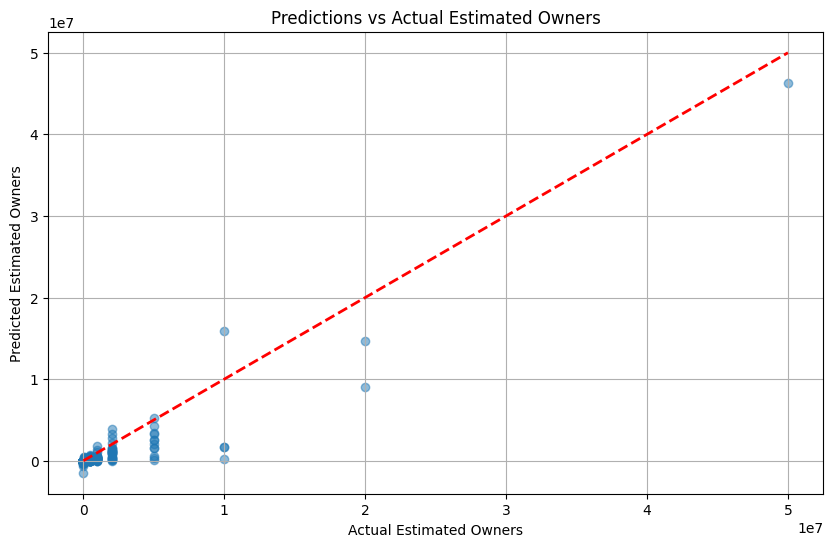

In [181]:
predictions, actual = generate_predictions_and_plot(trained_model, X_test, y_test)#####################

## Results

**TODO: (200 - 600 words) Explain the signifigance and meaning of the results from the model testing phase. You may want to copy and intersperse code blocks developing different values / visualizations from the results with multiple text cells explaining them.**

In [182]:
# Results

# Evaluate and visualize results from model testing.

## Conclusions / Lessons Learned

**TODO: (500 - 1000 words) Explain how your experiments led to either additional context, a full answer, or anything in between in relation to the question you posed for your project. Expand with other lessons learned, both in terms of the project topic, data science, and new tools or skills you've gained.**